<a href="https://colab.research.google.com/github/Kar3nOrtega/KarenOrtega/blob/main/Semana2/taller_redes_neuronaless2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Cargar dataset de ocupacion de sitios de parqueo
data_car = pd.read_csv("SJ.csv")
data_car.head()




,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [ ]:
# Revisar cabecera y cola del dataset
data_car.head()
data_car.tail()

,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [ ]:
# Formatear la columna de fecha como año y mes

data_car["date"] = pd.to_datetime(data_car["date"], format='%Y-%m')

In [ ]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto

data_car.head()

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665


In [ ]:
# Contar el numero de datos del dataset
data_car.count()

,0
date,18
idCompany,18
numTrx,18


In [ ]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
data_car.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [ ]:
# Revisar si el ldataset tiene datos nullos
data_car.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [ ]:
# Establecer el campo fecha como index del dataframe
data_car.set_index ('date', inplace = True)



In [ ]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
data_car.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


<Axes: xlabel='date'>

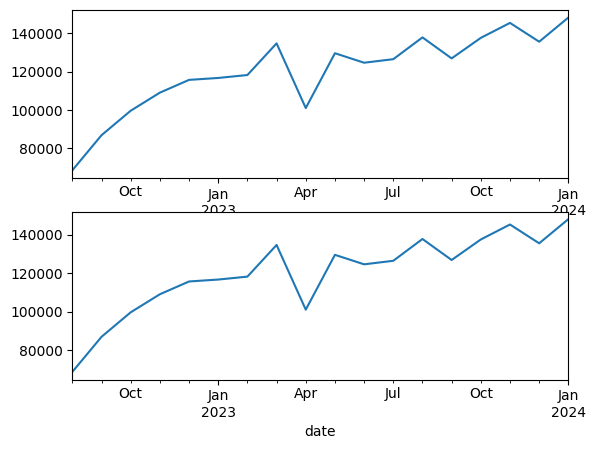

In [ ]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo

#graficar
plt.subplot(2,1,1)
data_car.numTrx.plot(style='-')
plt.subplot(2,1,2)
data_car['2022-08-01':'2024-01-01'].numTrx.plot(style='-')

In [ ]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
data_car = data_car.drop(labels=['idCompany'], axis=1)

data_car.head()

,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665


In [ ]:
# Escalar entre -1 y 1 los datos de la variable a predecir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler




In [ ]:
#tome datos entre -1 y 1
scalar = MinMaxScaler (feature_range=(-1,1))
data_car_arr = scalar.fit_transform(data_car)


data_car_arr

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [ ]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento


steps = 6
xtrain = []
ytrain = []

for i in range(len(data_car_arr)-steps):
  xtrain.append(data_car_arr[i:i+steps])
  ytrain.append(data_car_arr[i+steps])

xtest=[]
ytest=[]



In [ ]:
# Convertir las listas en arrays de numpy
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
xtrain = np.asanyarray(xtrain)
ytrain = np.asanyarray(ytrain)
print (xtrain.shape, ytrain.shape)

(12, 6, 1) (12, 1)


In [ ]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
#units son  numero de neuronas
# Una capa LSTM de 256 neuronas con activación relu
model.add(LSTM(units=256, return_sequences= True, activation ='relu', input_shape=(6,1)))
model.add(Dropout(0.07))
# Una capa LSTM de 128 neuronas con activación relu
model.add(LSTM(units=128, return_sequences= True, activation ='relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 64 neuronas con activación relu
model.add(LSTM(units=64, return_sequences= True, activation ='relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 32 neuronas con activación relu
model.add(LSTM(units=32, return_sequences= True, activation ='relu'))
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
model.add(Dropout(0.07))

# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
model.add(LSTM(units=16, return_sequences= False, activation ='relu'))
model.add(Dropout(0.07))

# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
model.add(Dense (64))
model.add(Dense (32))
# Finalmente agregar una capa densa de salida
model.add(Dense (1))
# Imprimir el summary del  modelo
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 6, 256)              │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 6, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 6, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 6, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529,473 (2.02 MB)

 Trainable params: 529,473 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilar el modelo con una funcion de error mse y un optimizador adam

#entrenar y optimizar
model.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16

history = model.fit(xtrain, ytrain, epochs=100 , validation_split=0.1, batch_size=16, verbose=1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.3360 - val_loss: 0.7040
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 0.3185 - val_loss: 0.6732
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.3006 - val_loss: 0.6417
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2828 - val_loss: 0.6092
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2648 - val_loss: 0.5759
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2464 - val_loss: 0.5418
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2285 - val_loss: 0.5070
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.2104 - val_loss: 0.4717
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1928 - val_loss: 0.4359
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.1766 - val_loss: 0.3998
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1590 - val_loss: 0.3636
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1438 

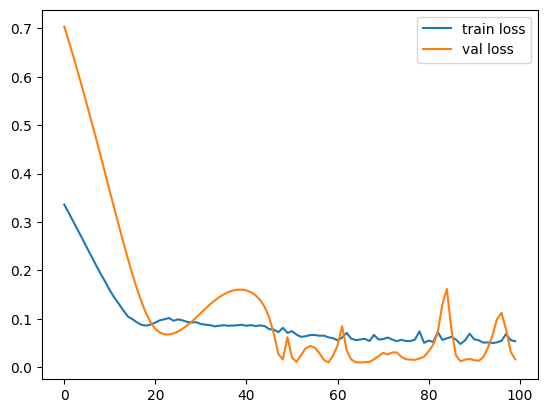

In [44]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.show()

In [45]:
# Guardar el modelo y salvarlo en disco

model.save("Karen_Ortega.h5")

In [47]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular
xin=np.array([68599,86862,99611,109018,115665])
xin_reshape=xin.reshape(1,5,1)
print(xin_reshape)

car_pred= model.predict(xin_reshape)

print(car_pred)

[[[ 68599]
  [ 86862]
  [ 99611]
  [109018]
  [115665]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
[[-70.41151]]


In [ ]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción

